In [1]:
#!/usr/bin/env python3

"""
Created on Mon Oct  4 14:54:00 2021

@author: robertamarinei
"""


    

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from datetime import datetime
from scipy.stats import norm




#f  = open('caen_test.txt')
#f  = open('test_data.txt')
#path = 'excel_acq/1400PMT_017_noDrift/result.txt'
#path = 'excel_acq/1400PMT_017/result.txt'
#path =  "excel_acq/ScopeSet_1/1400TPC_017/"#200 events
#path =  "excel_acq/ScopeSet_1/1400TPC_017_noDrift/"#109 events
#path =  "excel_acq/ScopeSet_2/1400TPC_017/"#200
#path =  "excel_acq/ScopeSet_2/1400TPC_017_noDrift/"#198
#path =  "excel_acq/ScopeSet_2/noDrift_GEMon/"#200
#path = "excel_acq/ThGEM2750/noDrift_1200ThGEMon_ii/"
#tot_evt = 200 #200
path = "excel_acq/ThGEM2750/CosmicTelescope/1250_1150_1100"
tot_evt = 11
trig_offset = 0#seconds. i.e. trigger offset is centred on the middle of the screen
volt_lim = -0.009

#path =  "excel_acq/ThGEM2750/1200ThGEM/"
#tot_evt = 200 #200
#trig_offset = 0#seconds. i.e. trigger offset is centred on the middle of the screen
#volt_lim = -0.009


# path =  "excel_acq/ThGEM2750/Setup3/1300ThGEM_noDrift/"
# tot_evt = 200 #200
# trig_offset = -3e-5#seconds. i.e. trigger offset is centred on the middle of the screen
# volt_lim = -0.009




#path =  "excel_acq/ThGEM2750/Setup2/1200ThGEM/"
#tot_evt = 182 #200
#trig_offset = -15e-6#seconds

f = open(path+"result.txt",'r')
#f = open('CAENGECO2020_update.txt')




In [2]:
ampl_TPC = []
time_TPC = []

all_ampl_TPC = []
ampl_Scint = []
time_Scint = []
dum_wf_sum= 0
wf_sum_Scint = []
wf_sum_TPC = []
time_st = []
bin_info=[]
Int_aft = []
Int_bef = []
sat_evt = []
sat_evt2 = []

evt_no = []
evt_no_good = []
for i in range(tot_evt):
    evt_no.append(i)

for i in range(tot_evt):
    ampl_TPC.append([])    
    time_TPC.append([])
    ampl_Scint.append([])
    time_Scint.append([])
    Int_bef.append(0)
    Int_aft.append(0)


#read data and store them in a list of list
dis = f.readlines()
f.close()
for i in dis:
        evt_,ch_,time_,ampl_ = i.split(',')
        if (ch_ == "C1"):
                ampl_TPC[int(evt_)].append(float(ampl_))
                time_TPC[int(evt_)].append(float(time_))
        elif (ch_ == "C2"): 
                ampl_Scint[int(evt_)].append(float(ampl_))   
                time_Scint[int(evt_)].append(float(time_))


for i in range(len(ampl_TPC[0])):
    wf_sum_Scint.append(0)
    wf_sum_TPC.append(0)


trigger_level = -0.017#volts
   

#    wf_sum_Scint.append(dum_wf_sum) 
#    wf_sum_TPC.append(dum_wf_sum_TPC)    
#    time_st.append(time_Scint[0][i])
            
fake_trigger = 0

#--------------------
#integrals before and after the trigger offset 
#--------------------
for i in  range(len(ampl_TPC)):
    for j in range(len(ampl_TPC[0])): 
        if (time_TPC[i][j]<trig_offset):
            Int_bef[i]+=abs(ampl_TPC[i][j])
        elif (time_TPC[i][j]>trig_offset):
            Int_aft[i]+=abs(ampl_TPC[i][j])

            
#--------------------
#determine which events are saturated and store them in sat_evt list
#--------------------
for i in range(len(evt_no)):
    if (Int_aft[i] > 240): 
        print ("method 1", evt_no[i], Int_aft[i])
        sat_evt.append(evt_no[i])
evt_no_good = evt_no    

#--------------------
#Do the waveform sum 
#--------------------
for i in  range(len(ampl_TPC)):
    #if i in sat_evt:  continue
    for j in range(len(ampl_TPC[0])):    
            all_ampl_TPC.append(ampl_Scint[i][j])
            wf_sum_Scint[j] += ampl_Scint[i][j] 
            wf_sum_TPC[j] += ampl_TPC[i][j]

time_st = time_Scint[0] 



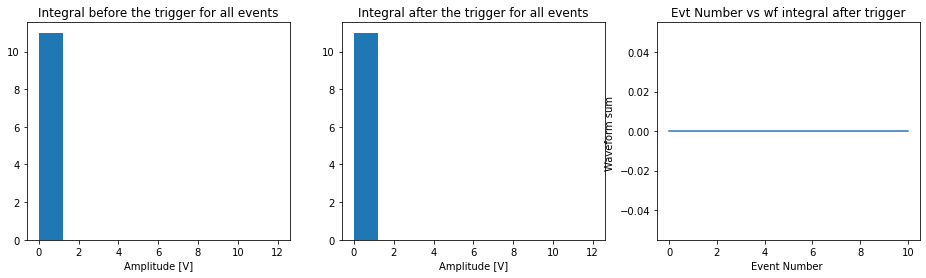

In [3]:

int_hist, int_hist_s = plt.subplots(1, 3, figsize=(16, 4), sharey=False)
int_hist_s[0].hist(Int_bef,range= (0, 12))
int_hist_s[0].set_title("Integral before the trigger for all events")
int_hist_s[0].set_xlabel("Amplitude [V]")
int_hist_s[1].hist(Int_aft, range= (0, 12))
int_hist_s[1].set_title("Integral after the trigger for all events")
int_hist_s[1].set_xlabel("Amplitude [V]")
int_hist_s[2].plot(evt_no,Int_aft)
int_hist_s[2].set_title("Evt Number vs wf integral after trigger")
int_hist_s[2].set_xlabel("Event Number ")
int_hist_s[2].set_ylabel("Waveform sum ")

int_hist.savefig(path+"integrals.pdf")



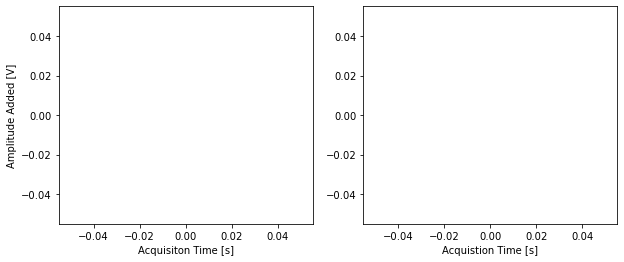

In [4]:

#plt.bar(time_TPC[0], wf_sum)
#plt.bar(x,y)
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=False)
# Set common labels

axs[0].set_xlabel('Acquisiton Time [s]')
axs[0].set_ylabel('Amplitude Added [V]')
axs[1].set_xlabel('Acquistion Time [s]')
axs[0].plot(time_st, wf_sum_Scint)
axs[1].plot(time_st,wf_sum_TPC)
fig.savefig(path+"wf_added.pdf")



IndexError: list index out of range

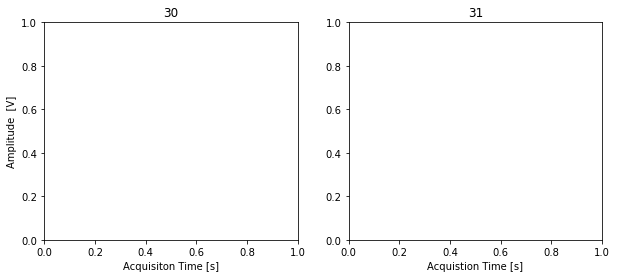

In [5]:


fig2, axs2 = plt.subplots(1, 2, figsize=(10, 4), sharey=False)
axs2[0].set_xlabel('Acquisiton Time [s]')
axs2[0].set_ylabel('Amplitude  [V]')
axs2[1].set_xlabel('Acquistion Time [s]')
evt_pl =30
axs2[0].set_title(evt_pl)
axs2[1].set_title(evt_pl +1)

axs2[0].plot(time_Scint[4],ampl_Scint[evt_pl])
axs2[0].plot(time_TPC[4],ampl_TPC[evt_pl])


axs2[1].plot(time_Scint[4],ampl_Scint[evt_pl+1])
axs2[1].plot(time_TPC[4],ampl_TPC[evt_pl +1])

fig2.savefig(path+"single_events.pdf")



In [ ]:
# import pandas
import pandas as pd

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
evt_pl = sat_evt[2]
ax.set_title(evt_pl)
# make a plot
ax.plot(time_Scint[4],ampl_Scint[evt_pl])
# set x-axis label
ax.set_xlabel("Acquisition Window [us]",fontsize=14)
# set y-axis label
ax.set_ylabel("Scintillator Amplitude",color="blue",fontsize=14)
#Next we use twinx() function to create the second axis object “ax2”. Now we use the second axis object “ax2” to make plot of the second y-axis variable and update their labels.
# twin object for two different y-axis on the sample plot


ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(time_TPC[4],ampl_TPC[evt_pl], color = "red")
ax2.set_ylabel("TPC Amplitude",color="red",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig(path+'single_event_diff_axis.pdf',
            format='pdf', bbox_inches='tight')


